<a href="https://colab.research.google.com/github/LuisPeMoraRod/AI-Laboratories/blob/main/Lab10_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 1
Programe el algoritmo del perceptrón genérico que reciba cualquier set de datos

In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score


In [48]:
class Perceptron:
    def __init__(self, learning_rate=0.01, iters_max=1000):
        self.lr = learning_rate
        self.iters_max = iters_max
        self.activation_func = self.activation_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iters_max):

          for i, x_i in enumerate(X):

              linear_output = np.dot(x_i, self.weights) + self.bias
              y_predicted = self.activation_func(linear_output)

              error = y[i] - y_predicted
              if (abs(error) > 0):
                update = self.lr * error

                self.weights += update * x_i
                self.bias += update

          y_predict = self.predict(X)
          e = np.subtract(y, y_predict)
          #stop trainning when error is zero for all observations
          if (np.sum(e) == 0):
            break
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def activation_func(self, x):
        return np.where(x >= 0, 1, 0)

### Ejercicio 2
Ejecute el programa con un set de datos de al menos 1000 observaciones y 3 características.

In [55]:
OBSERVATIONS = 1000
X, y = datasets.make_blobs(n_samples=OBSERVATIONS, n_features=3, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, iters_max=1000)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

print(f'Precisión en las predicciones: {accuracy_score(y_test, y_pred)*100}%')

Precisión en las predicciones: 100.0%


### Ejercicio 3
Grafique los datos del punto 2 con un plano que evidencia la separación de los datos y las observaciones.

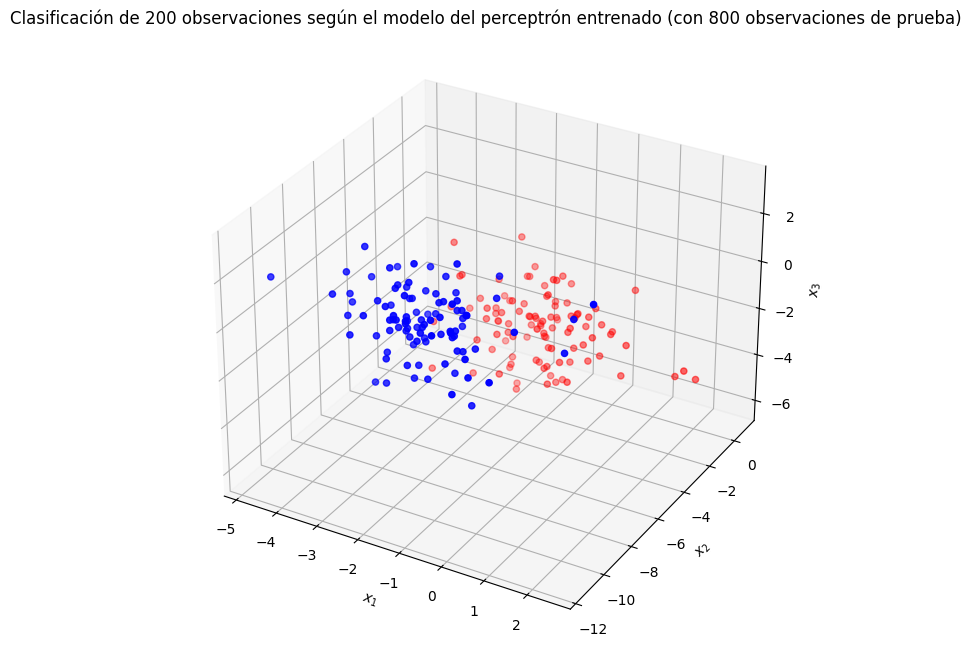

In [73]:
def plot_steps(points: np.ndarray, title: str):

  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')

  points = np.transpose(points)
  x1_points = points[0].astype(float)
  x2_points = points[1].astype(float)
  x3_points = points[2].astype(float)

  def set_color(y):
    return "red" if y == 1 else "blue"
  color = np.vectorize(set_color)
  colors = color(y_test)

  ax.scatter(x1_points, x2_points, x3_points, c=colors) #plot steps
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_zlabel('$x_{3}$')
  ax.set_title(title)

plot_steps(X_test, "Clasificación de 200 observaciones según el modelo del perceptrón entrenado (con 800 observaciones de prueba)")